
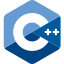
<br>

<div style="text-align:center; font-size:200%;">
 <b>Concrete Factory und Builder</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 05 Concrete Factory und Builder.ipynb -->
<!-- slides/module_500_solid_grasp/topic_270_adventure_factory.cpp -->


### Adventure Game Version 3b

- Zuweisung von Funktionalität zu `World` und `Location` ist sinnvoll
- Wir sehen, dass `World` in Gefahr ist, zu viele "Änderungsgründe" zu haben
  - Änderungen an der Implementierung der Spiele-Welt
  - Änderungen an den Initialisierungsdaten (z.B. XML statt JSON)
- Können wir das vermeiden?


# Concrete Factory (Simple Factory)

- Einfachere Version des Abstract Factory Patterns aus dem GoF Buch

### Frage

- Wer soll ein Objekt erzeugen, wenn es Umstände gibt, die gegen Creator
  sprechen?
  - komplexe Logik zur Erzeugung
  - Kohäsion
  - Viele Parameter zur Erzeugung notwendig

### Antwort

- Eine Klasse, die nur für die Erzeugung von Objekten zuständig ist
- Diese Klassen werden oft als *Factory* bezeichnet


- Factories sind Beispiele für das GRASP Pattern "Pure Fabrication"
- Sie können die Kohäsion von Klassen erhöhen und ihre Komplexität reduzieren
- Sie erhöhen aber auch die Gesamtkomplexität des Systems


## Beispiel

- In Version 3b ist der Konstruktor von `World` relativ komplex
- Wir können die Erzeugung in eine Factory auslagern
- Siehe `code/adventure/v3c`


## C++: Benannte Parameter Idiom

Das C++-Idiom "Benannte Parameter" (engl. "Named Parameters") ist eine
Variante des Factory Patterns.

- C++ unterstützt keine benannten Parameter
- Manchmal ist es schwer, Funktionen mit vielen Parametern zu vermeiden
  - Insbesondere bei der Konstruktion von Objekten
- Selbst wenn wir Default-Werte verwenden, müssen wir viele der Parameter angeben
  - Alle Parameter vor demjenigen, den wir ändern wollen
- Es ist schwer, den Überblick zu behalten, welche Parameter was bedeuten
  - Moderne IDEs vereinfachen das
- Wie können wir Funktionen mit vielen Parametern übersichtlich gestalten?


# Benannte Parameter / Builder Pattern

### Frage

- Wie können wir Funktionen mit vielen Parametern verständlich gestalten?
- Wie können wir komplexe Objekte konstruieren?

### Antwort

- Hilfsklasse, die die Parameter speichert
- Methoden, die einzelne Parameter setzen
  - Jede dieser Methoden gibt `*this` als Referenz zurück
- Eine `build()` oder `execute()` Methode

In [ ]:
#include <iostream>

In [ ]:
class Window {
public:
    Window(int width, int height, int x, int y,
           bool visible, bool active, bool resizable,
           bool fullscreen) {
        std::cout << "Building window with width=" << width
                  << ", height=" << height << ", x=" << x << ", y=" << y
                  << ", visible=" << visible << ", active=" << active
                  << ", resizable=" << resizable
                  << ", fullscreen=" << fullscreen << "\n";
    }
};

In [ ]:
Window window(800, 600, 0, 0, true, true, true, false);

In [ ]:
class WindowBuilder {
public:
    WindowBuilder() = default;

    Window build() {
        return Window(this->width_, this->height_, this->x_,
                      this->y_, this->visible_, this->active_,
                      this->resizable_, this->fullscreen_);
    }

    WindowBuilder& width(int width) {
        this->width_ = width;
        return *this;
    }
    WindowBuilder& height(int height) {
        this->height_ = height;
        return *this;
    }
    WindowBuilder& x(int x) {
        this->x_ = x;
        return *this;
    }
    WindowBuilder& y(int y) {
        this->y_ = y;
        return *this;
    }
    WindowBuilder& visible(bool visible) {
        this->visible_ = visible;
        return *this;
    }
    WindowBuilder& active(bool active) {
        this->active_ = active;
        return *this;
    }
    WindowBuilder& resizable(bool resizable) {
        this->resizable_ = resizable;
        return *this;
    }
    WindowBuilder& fullscreen(bool fullscreen) {
        this->fullscreen_ = fullscreen;
        return *this;
    }


private:
    int width_ = 800;
    int height_ = 600;
    int x_ = 0;
    int y_ = 0;
    bool visible_ = true;
    bool active_ = true;
    bool resizable_ = true;
    bool fullscreen_ = false;
};

In [ ]:
Window default_window{WindowBuilder{}.build()};

In [ ]:
Window my_window{WindowBuilder{}.height(200).resizable(false).build()};


- Die Member-Funktionen von `WindowBuilder` können als `constexpr` deklariert
  werden
- Damit ist auch die Erzeugung von Objekten zur Compile-Zeit möglich
- [Compiler-Explorer](https://godbolt.org/z/848n6rEfE)


## Workshop: Implementierung eines Email-Builders

In diesem Workshop erstellen Sie einen Builder für eine bestehende
`Email`-Klasse. Diese Klasse repräsentiert eine E-Mail-Nachricht mit
verschiedenen Feldern wie Absender, Empfänger, Betreff und Inhalt:

In [ ]:
class Email {
private:
    std::string sender_;
    std::vector<std::string> recipients_;
    std::vector<std::string> cc_;
    std::vector<std::string> bcc_;
    std::string subject_;
    std::string body_;
    bool isHtml_;
    int priority_;

public:
    Email(const std::string& sender,
          const std::vector<std::string>& recipients,
          const std::vector<std::string>& cc,
          const std::vector<std::string>& bcc,
          const std::string& subject,
          const std::string& body,
          bool isHtml,
          int priority)
        : sender_{sender}, recipients_{recipients}, cc_{cc}, bcc_{bcc},
          subject_{subject}, body_{body}, isHtml_{isHtml}, priority_{priority} {}

    std::string getSender() const { return sender_; }
    std::vector<std::string> getRecipients() const { return recipients_; }
    std::vector<std::string> getCc() const { return cc_; }
    std::vector<std::string> getBcc() const { return bcc_; }
    std::string getSubject() const { return subject_; }
    std::string getBody() const { return body_; }
    bool getIsHtml() const { return isHtml_; }
    int getPriority() const { return priority_; }
};

In [ ]:
#include <iostream>
#include <sstream>

In [ ]:
namespace std {
ostream& operator<<(std::ostream& os, const Email& email) {
    os << "Email Details:\n"
       << "From: " << email.getSender() << "\n"
       << "To: ";

    for (const auto& recipient : email.getRecipients()) {
        os << recipient << "; ";
    }
    os << "\n";

    if (!email.getCc().empty()) {
        os << "CC: ";
        for (const auto& cc : email.getCc()) {
            os << cc << "; ";
        }
        os << "\n";
    }

    if (!email.getBcc().empty()) {
        os << "BCC: ";
        for (const auto& bcc : email.getBcc()) {
            os << bcc << "; ";
        }
        os << "\n";
    }

    os << "Subject: " << email.getSubject() << "\n"
       << "Body: " << email.getBody() << "\n"
       << "HTML: " << (email.getIsHtml() ? "Yes" : "No") << "\n"
       << "Priority: " << email.getPriority() << "\n";

    return os;
}
}  // namespace std


### Ziel

Implementieren Sie eine `EmailBuilder`-Klasse, die eine flexiblere und
lesbare Möglichkeit bietet, `Email`-Objekte zu erstellen.


### Aufgaben

1. Sehen Sie sich die bereitgestellte `Email`-Klasse an.
2. Erstellen Sie eine `EmailBuilder`-Klasse mit Methoden zum Setzen jedes
   Feldes der `Email`-Klasse.
3. Implementieren Sie eine `build()`-Methode in der `EmailBuilder`-Klasse, die
   ein vollständig konstruiertes `Email`-Objekt zurückgibt.
4. Stellen Sie sicher, dass der `EmailBuilder` Method Chaining für ein
   fluid Interface unterstützt.
5. Rufen Sie Ihren `EmailBuilder` auf und erstellen Sie damit ein
   `Email`-Objekt.

Sie sollten in der Lage sein, ein `Email`-Objekt mit dem `EmailBuilder` wie
folgt zu erstellen:

```cpp
Email email = EmailBuilder()
    .from("sender@example.com")
    .to("recipient@example.com")
    .subject("Meeting Tomorrow")
    .body("Let's meet at 2 PM.")
    .build();
```

In [ ]:
#include <string>
#include <vector>
#include <stdexcept>

In [ ]:
class EmailBuilder {
private:
    std::string sender_;
    std::vector<std::string> recipients_;
    std::vector<std::string> cc_;
    std::vector<std::string> bcc_;
    std::string subject_;
    std::string body_;
    bool isHtml_{};
    int priority_{3};

public:
    EmailBuilder& from(const std::string& sender) {
        this->sender_ = sender;
        return *this;
    }

    EmailBuilder& to(const std::string& recipient) {
        this->recipients_.push_back(recipient);
        return *this;
    }

    EmailBuilder& cc(const std::string& ccRecipient) {
        this->cc_.push_back(ccRecipient);
        return *this;
    }

    EmailBuilder& bcc(const std::string& bccRecipient) {
        this->bcc_.push_back(bccRecipient);
        return *this;
    }

    EmailBuilder& subject(const std::string& subject) {
        this->subject_ = subject;
        return *this;
    }

    EmailBuilder& body(const std::string& body) {
        this->body_ = body;
        return *this;
    }

    EmailBuilder& html(bool isHtml) {
        this->isHtml_ = isHtml;
        return *this;
    }

    EmailBuilder& priority(int priority) {
        this->priority_ = priority;
        return *this;
    }

    Email build() {
        if (sender_.empty()) {
            throw std::runtime_error("Email must have a sender.");
        }
        if (recipients_.empty()) {
            throw std::runtime_error("Email must have at least one recipient.");
        }
        if (subject_.empty()) {
            throw std::runtime_error("Email must have a subject.");
        }
        if (body_.empty()) {
            throw std::runtime_error("Email must have a body.");
        }
        return Email(sender_, recipients_, cc_, bcc_, subject_, body_, isHtml_, priority_);
    }
};

In [ ]:
Email email1 = EmailBuilder()
    .from("sender@example.com")
    .to("recipient@example.com")
    .subject("Meeting Tomorrow")
    .body("Let's meet at 2 PM.")
    .build();

In [ ]:
std::cout << email1 << std::endl;

In [ ]:
Email email2 = EmailBuilder()
    .from("sender@example.com")
    .to("recipient1@example.com")
    .to("recipient2@example.com")
    .cc("cc@example.com")
    .subject("Important Meeting")
    .body("<p>Please join us for an <strong>important</strong> meeting tomorrow at 10 AM.</p>")
    .html(true)
    .priority(1)
    .build();

In [ ]:
std::cout << email2 << std::endl;